In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('Mall_Customers.csv')

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [59]:
df.shape

(200, 5)

In [60]:
print("number of Rows", df.shape[0])
print("number of Columns", df.shape[1])

number of Rows 200
number of Columns 5


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Kmeans Clustering



In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [65]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [66]:
from sklearn.cluster import KMeans

In [67]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [68]:
k_means = KMeans()
k_means.fit_predict(X)

array([3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 5, 0, 4, 0, 5, 0, 5, 0,
       4, 0, 5, 0, 5, 0, 5, 0, 5, 0, 4, 0, 5, 0, 4, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 4, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7], dtype=int32)

Elbow Method to finf Optimal Number of clusters
WCSS-Within Cluster sum of squares

In [69]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [70]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25388.76002817936,
 21881.87850706096,
 19704.123543147773]

In [71]:
import  matplotlib.pyplot as plt

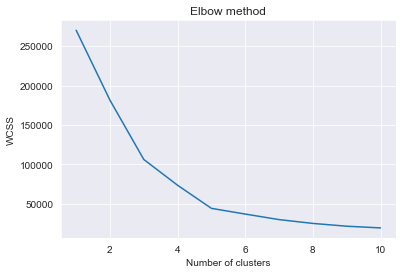

In [72]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The elbow happens on 5 which shows % is the required number of clusters

Model Training

In [73]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [74]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [75]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

In [76]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

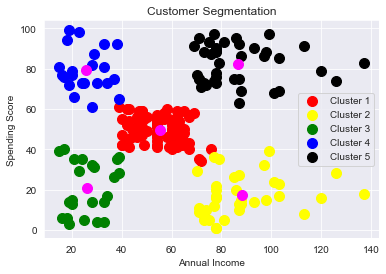

In [77]:
plt.scatter(X.iloc[y_means ==0,0],X.iloc[y_means ==0,1],s=100,c='red',label = "Cluster 1")
plt.scatter(X.iloc[y_means ==1,0],X.iloc[y_means ==1,1],s=100,c='yellow',label = "Cluster 2")
plt.scatter(X.iloc[y_means ==2,0],X.iloc[y_means ==2,1],s=100,c='green',label = "Cluster 3")
plt.scatter(X.iloc[y_means ==3,0],X.iloc[y_means ==3,1],s=100,c='blue',label = "Cluster 4")
plt.scatter(X.iloc[y_means ==4,0],X.iloc[y_means ==4,1],s=100,c='black',label = "Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.legend()
plt.show()

cluster 1 represents customers with medium annual income and spending score
cluster 2 represents customers with high annual income and low spending score
cluster 3 represents customers with low annual income and low spending score
cluster 4 represents customers with low annual income and high spending score
cluster 5 represents customers with hugh annual income and high spending score

In [78]:
 k_means.predict([[15,39]])

array([2], dtype=int32)

prediction shows customer s with ID 15 and 39 belongs to cluster 3 with index 2

SAVE THE MODEL

In [79]:
import joblib

In [80]:
#model has been saved
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

loading model

In [81]:
model = joblib.load("customer_segmentation")

In [82]:
model.predict([[15,39]])

array([2], dtype=int32)

GUI

In [83]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())

    model = joblib.load("customer_segmentation")
    result = model.predict([[p1,p2]])
    print("This Customer belongs to Cluster no: ",result[0])
    if result[0] == 0:
        Label(master, text= "Customers with medium annual income and medium annual spending ")
    elif result[0] == 1:
        Label(master, text= "Customers with high annual income but low annual spending")
    elif result[0] ==2:
        Label(master, text= "Customer with low annual income and low annual spending ")
    elif result[0] ==3:
        Label(master, text= "Customer with low annual income but high annual spending ")
    elif result[0] ==4:
        Label(master, text= "Customer with high annual income and high annual spending ")

master =Tk()
master.title("Customer Segmentation Using Machine Learning")

label = Label(master, text= "Customer Segmentation Using Machine Learning", bg="black",fg="white").grid(row = 0, columnspan=2)

Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text = 'Predict', command = show_entry_fields).grid()

mainloop()